The following analysis is completed on a passenger data table.
From what we can deduce the passenger table consists of monthly summed data for airline, route and aircraft

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sklearn as sk
import numpy as np
import seaborn as sns

### Import Data

In [2]:
pass_df = pd.read_csv('passenger_sample_50k.csv')

### Sample data based on Flight Table Carriers

In [3]:
array = ['AA','AS','B6','DL','F9','G4','HA','NK','UA','VX','WN'] # Flight carriers from Flights Table
pass_df = pass_df.loc[pass_df['unique_carrier'].isin(array)] # passenger table filtered by flights table carriers

Import route keys from CSV. Route keys generated from SJ_Flights_EDA_Baseline_Modelling.ipynb. Covers all routes in the sample db.

In [4]:
route_keys = pd.read_csv('route_keys.csv')
route_keys = route_keys.drop(['Unnamed: 0'], axis =1)
array_route_keys = route_keys['0'].values.tolist()
array_route_keys = [str(x) for x in array_route_keys]

Create route ID for feature grouping aggregations

In [5]:
pass_df[['origin_airport_id', 'dest_airport_id']] =  pass_df[['origin_airport_id', 'dest_airport_id']].astype(str)
pass_df['route_id'] = pass_df['origin_airport_id'] + pass_df['dest_airport_id']

In [6]:
#check for nulls
total_nulls = pass_df.isnull().sum().sort_values(ascending=False)
percent = (pass_df.isnull().sum()/pass_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_nulls, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
# no nulls

,Total,Percent
departures_performed,0,0.0
payload,0,0.0
class,0,0.0
distance_group,0,0.0
year,0,0.0
month,0,0.0
aircraft_config,0,0.0
aircraft_type,0,0.0
aircraft_group,0,0.0
dest_country,0,0.0


In [7]:
total_zeros = (pass_df == 0).sum().sort_values(ascending=False)
percent = (pass_df == 0).sum()*100/(pass_df == 0).count().sort_values(ascending=False)
zero_count = pd.concat([total_zeros, percent], axis=1, keys=['Total', 'Percent'])
zero_count.head(20)

,Total,Percent
mail,15400,74.648570
freight,8758,42.452739
passengers,505,2.447891
seats,319,1.546292
air_time,288,1.396025
departures_performed,286,1.386331
payload,286,1.386331
ramp_to_ramp,283,1.371789
distance,4,0.019389
aircraft_config,0,0.000000


In [8]:
# drop columns
pass_df = pass_df.drop(['distance', 'air_time', 'ramp_to_ramp'], axis =1)

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = pass_df.select_dtypes(include=numerics)

/Users/simonj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='departures_performed', ylabel='Density'>

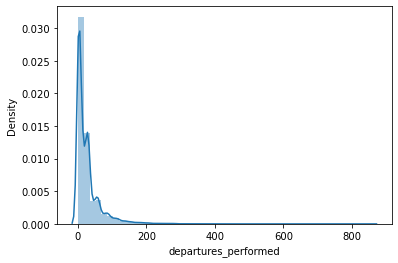

In [10]:
# heavily scewed to the right
sns.distplot(pass_df["departures_performed"])

/Users/simonj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='payload', ylabel='Density'>

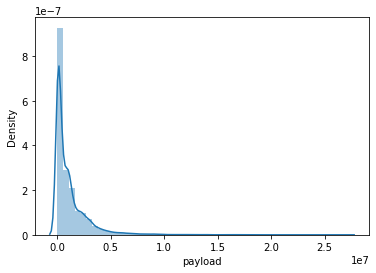

In [11]:
sns.distplot(pass_df["payload"])

<AxesSubplot:xlabel='payload', ylabel='Count'>

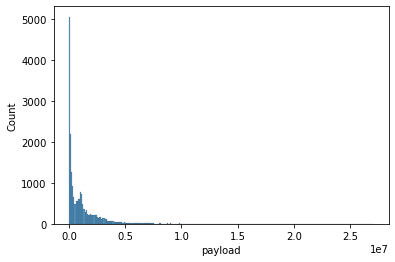

In [12]:
sns.histplot(pass_df["payload"])

/Users/simonj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='seats', ylabel='Density'>

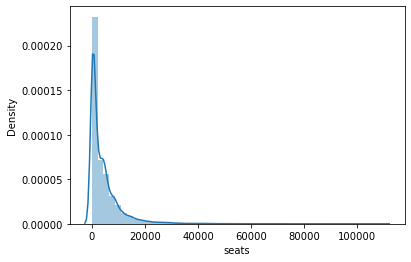

In [13]:
sns.distplot(pass_df["seats"])

In [14]:
def distributions(df):
    for i in df:
        sns.distplot(df[i])
    

<AxesSubplot:xlabel='year', ylabel='Count'>

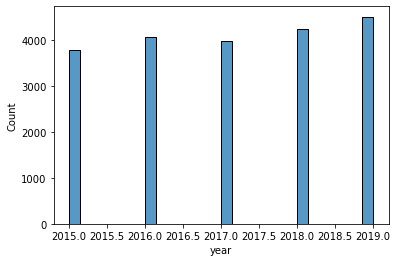

In [15]:
# year, distance group, month, aircraft config, aircraft_type. 
data = pass_df
sns.histplot(data=data, x='year')

<AxesSubplot:xlabel='unique_carrier', ylabel='Count'>

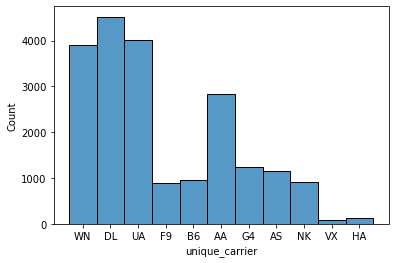

In [16]:
# year, distance group, month, aircraft config, aircraft_type. 
data = pass_df
sns.histplot(data=data, x='unique_carrier')

<AxesSubplot:xlabel='month', ylabel='Count'>

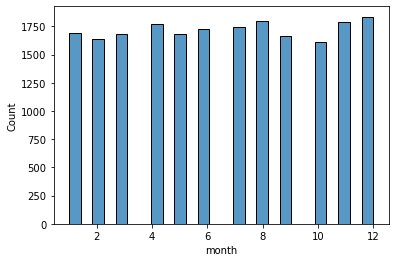

In [17]:
# year, distance group, month, aircraft config, aircraft_type. 
data = pass_df
sns.histplot(data=data, x='month')

<AxesSubplot:xlabel='distance_group', ylabel='Count'>

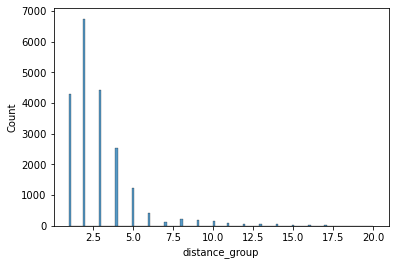

In [18]:
# year, distance group, month, aircraft config, aircraft_type. 
data = pass_df
sns.histplot(data=data, x='distance_group')

<AxesSubplot:xlabel='aircraft_config', ylabel='Count'>

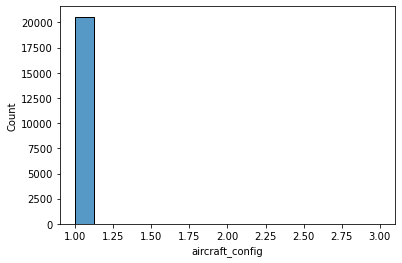

In [19]:
# year, distance group, month, aircraft config, aircraft_type. 
data = pass_df
sns.histplot(data=data, x='aircraft_config')

<AxesSubplot:xlabel='aircraft_type', ylabel='Count'>

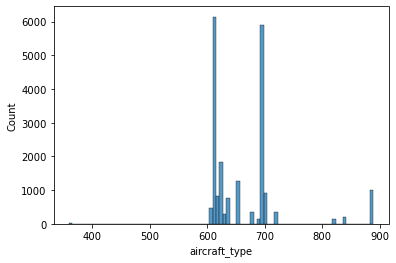

In [20]:
# year, distance group, month, aircraft config, aircraft_type. 
data = pass_df
sns.histplot(data=data, x='aircraft_type')

In [21]:
#import plotly.express as px
#df = flight_df_std_trans.corr()
#fig = px.imshow(df, text_auto=True, aspect="auto")
#fig.show()

<AxesSubplot:xlabel='aircraft_group', ylabel='Count'>

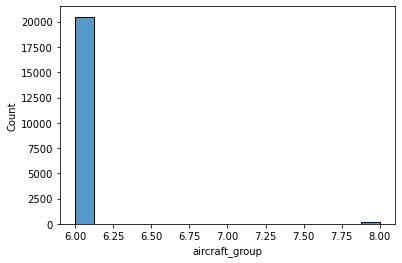

In [22]:
# year, distance group, month, aircraft config, aircraft_type. 
data = pass_df
sns.histplot(data=data, x='aircraft_group')

<AxesSubplot:xlabel='class', ylabel='Count'>

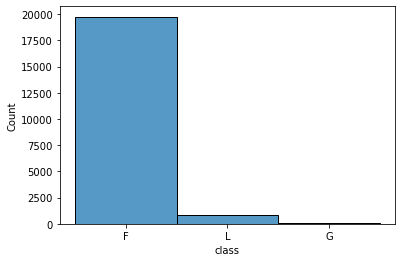

In [23]:
# year, distance group, month, aircraft config, aircraft_type. 
data = pass_df
sns.histplot(data=data, x='class')

<AxesSubplot:xlabel='aircraft_type', ylabel='seats_per_flight'>

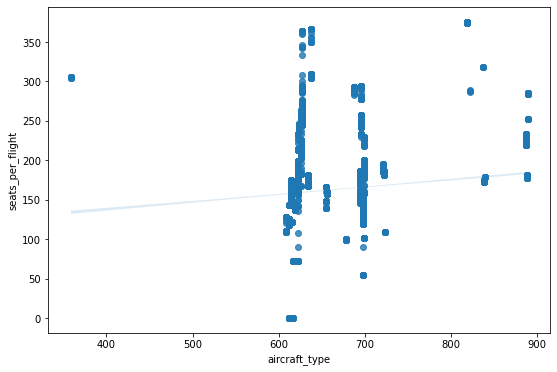

In [24]:
pass_df['seats_per_flight'] = pass_df['seats'] / pass_df['departures_performed']
# aircraft type vs seats
f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=pass_df['aircraft_type'], y=pass_df["seats_per_flight"], data=pass_df, order=1)

<AxesSubplot:xlabel='seats_per_flight', ylabel='Count'>

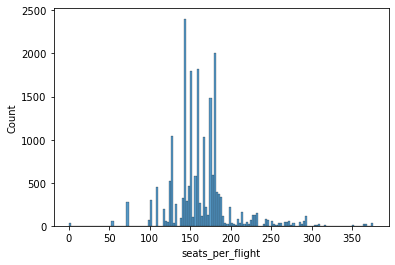

In [25]:
sns.histplot(pass_df["seats_per_flight"])

<AxesSubplot:xlabel='aircraft_type', ylabel='payload_per_flight'>

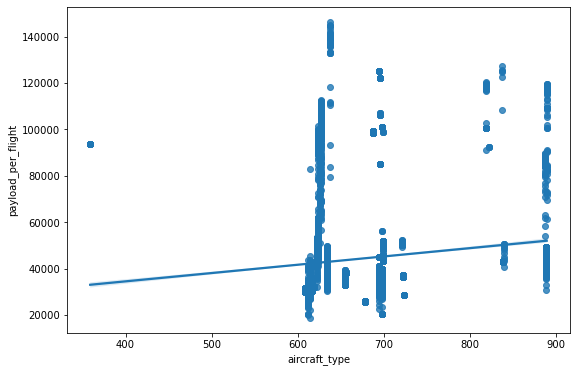

In [26]:
pass_df['payload_per_flight'] = pass_df['payload'] / pass_df['departures_performed']
# aircraft type vs seats
f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=pass_df['aircraft_type'], y=pass_df["payload_per_flight"], data=pass_df, order=1)

# Feature Genertion

In [27]:
# Feature Plane Capacity ratio =
pass_df['capacity_ratio'] = pass_df['passengers'] / pass_df['seats']
# mail ratio = 
pass_df['mail_ratio'] = pass_df['mail'] / pass_df['payload']
# freight ratio =
pass_df['freight_ratio'] = pass_df['freight'] / pass_df['payload']

In [28]:
pass_df['mail_per_flight'] = pass_df['mail'] / pass_df['departures_performed']
pass_df['freight_per_flight'] = pass_df['freight'] / pass_df['departures_performed']
pass_df['pass_per_flight'] = pass_df['passengers'] / pass_df['departures_performed']

In [29]:
avg_ratio_per_route = pass_df.groupby(['route_id'])['mail_ratio', 'capacity_ratio', 'freight_ratio'].mean()
avg_per_route = pass_df.groupby(['route_id'])['mail_per_flight', 'freight_per_flight', 'pass_per_flight'].mean()

/var/folders/w6/sy887bgd32s1j5gq5fj42l000000gn/T/ipykernel_48093/518243811.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_ratio_per_route = pass_df.groupby(['route_id'])['mail_ratio', 'capacity_ratio', 'freight_ratio'].mean()
/var/folders/w6/sy887bgd32s1j5gq5fj42l000000gn/T/ipykernel_48093/518243811.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_per_route = pass_df.groupby(['route_id'])['mail_per_flight', 'freight_per_flight', 'pass_per_flight'].mean()


In [30]:
route_features = pd.merge(avg_ratio_per_route, avg_per_route, on="route_id")

Export to csv to send into model sheet

In [31]:
from pathlib import Path 
filepath = Path('./pass_route_features.csv')  
route_features.to_csv(filepath)

The following features do not map correctly so will be dismissed for the time being

In [32]:
carrier_avg_ratio_per_route = pass_df.groupby(['route_id', 'unique_carrier'])['mail_ratio', 'capacity_ratio', 'freight_ratio'].mean()
carrier_avg_per_route = pass_df.groupby(['route_id', 'unique_carrier'])['mail_per_flight', 'freight_per_flight', 'pass_per_flight'].mean()

/var/folders/w6/sy887bgd32s1j5gq5fj42l000000gn/T/ipykernel_48093/3179343982.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  carrier_avg_ratio_per_route = pass_df.groupby(['route_id', 'unique_carrier'])['mail_ratio', 'capacity_ratio', 'freight_ratio'].mean()
/var/folders/w6/sy887bgd32s1j5gq5fj42l000000gn/T/ipykernel_48093/3179343982.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  carrier_avg_per_route = pass_df.groupby(['route_id', 'unique_carrier'])['mail_per_flight', 'freight_per_flight', 'pass_per_flight'].mean()


In [33]:
### come back to the items below. There is something weird going on with the indexes

In [34]:
#carrier_route_features = pd.merge(carrier_avg_ratio_per_route, carrier_avg_per_route, on="route")